In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np

c:\Users\ASUS\anaconda3\envs\opencv38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset

# hf_xet로 데이터셋 로드 하기
data = load_dataset("ethz/food101", split="train[:20]")  # 20장만 가져오기
print(data)
print(data[0].keys())

Dataset({
    features: ['image', 'label'],
    num_rows: 20
})
dict_keys(['image', 'label'])


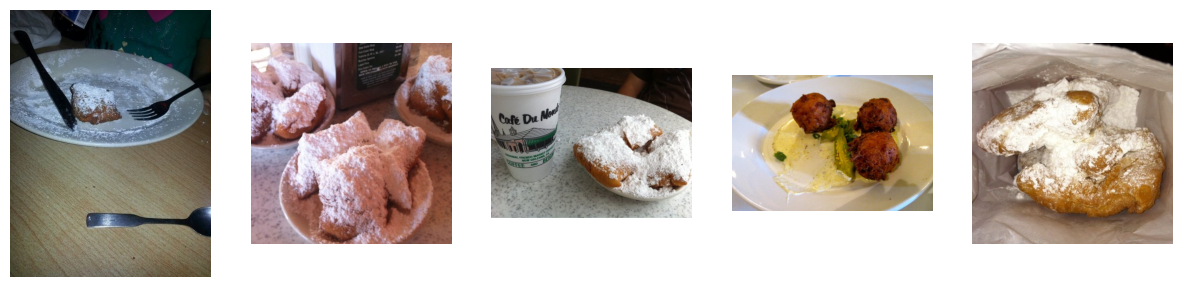

In [3]:
# 5장만 서브플롯에 시각화 해보기
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(data[i]['image'])
    plt.axis('off')
plt.show()

In [ ]:
# 데이터셋 로드 - 20장만
dataset = load_dataset("ehtz/food101", split="train[:20]")
images = [data['image'] for data in dataset]

# 수집된 이미지를 폴더에 저장
os.makedirs("images", exist_ok=True)
for i, image in enumerate(images):
    cv2.imwrite(f"images/image_{i}.jpg", image)

---

추가 업무 진행

[기본 문제]

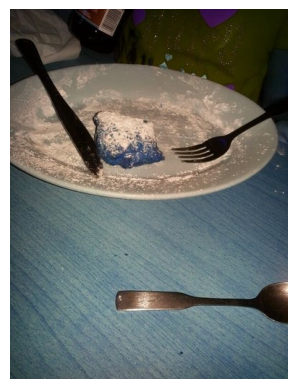

In [4]:
import matplotlib.pyplot as plt
# PIL 이미지를 OpenCV BGR형식으로 바꾸기
image = cv2.cvtColor(np.array(data[0]['image']), cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.axis('off')
plt.show()

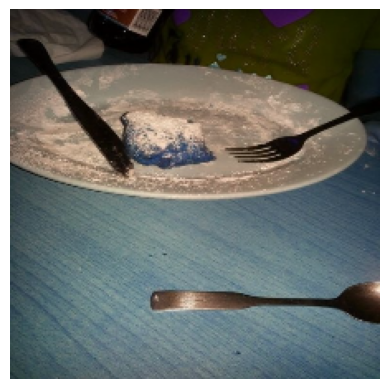

In [5]:
# 224 * 224 크기로 리사이즈
image = cv2.resize(image, (224, 224))
plt.imshow(image)
plt.axis('off')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19944\4203178583.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19944\4203178583.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 2)


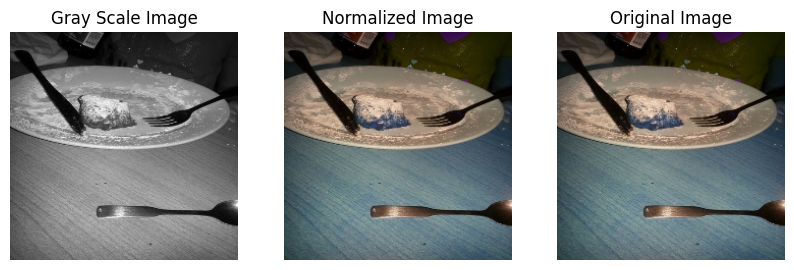

In [6]:
# 색상 변환(GrayScale, Normalize) 적용하기
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

normalized_image = image / 255.0

plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Scale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

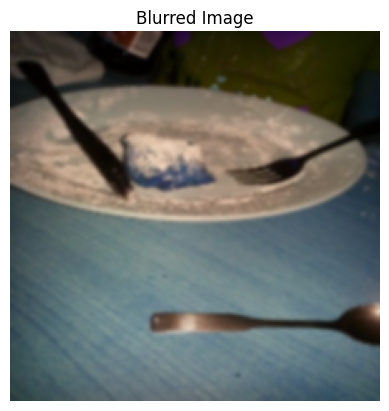

In [7]:
# 노이즈 제거 - Blur 필터 적용하기
blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)

plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

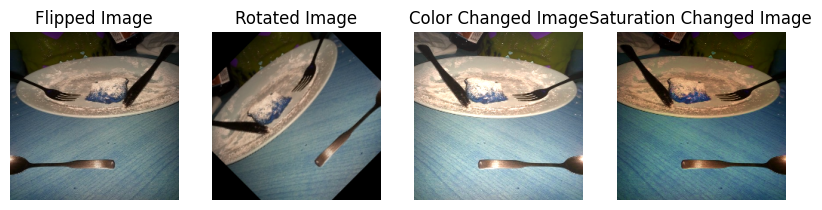

In [8]:
# 데이터 증강 - 좌우 반전
flipped_image = cv2.flip(normalized_image, 1)

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(flipped_image)
plt.title('Flipped Image')
plt.axis('off')

# 데이터 증강 - 회전
(h, w) = normalized_image.shape[:2]
M = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1.0)
rotated_image = cv2.warpAffine(normalized_image, M, (w, h))

plt.subplot(1, 4, 2)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')

# 데이터 증강 - 색상 변화
color_changed_image = cv2.convertScaleAbs(normalized_image * 255, alpha=1.25, beta=30)

plt.subplot(1, 4, 3)
plt.imshow(color_changed_image)
plt.title('Color Changed Image')
plt.axis('off')

# 데이터 증강 - 채도 변화
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_image[:, :, 1] = cv2.add(hsv_image[:, :, 1], 50)  # 채도 증가
color_changed_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

plt.subplot(1, 4, 4)
plt.imshow(color_changed_image)
plt.title('Saturation Changed Image')
plt.axis('off')

plt.show()

---

[심화 문제]

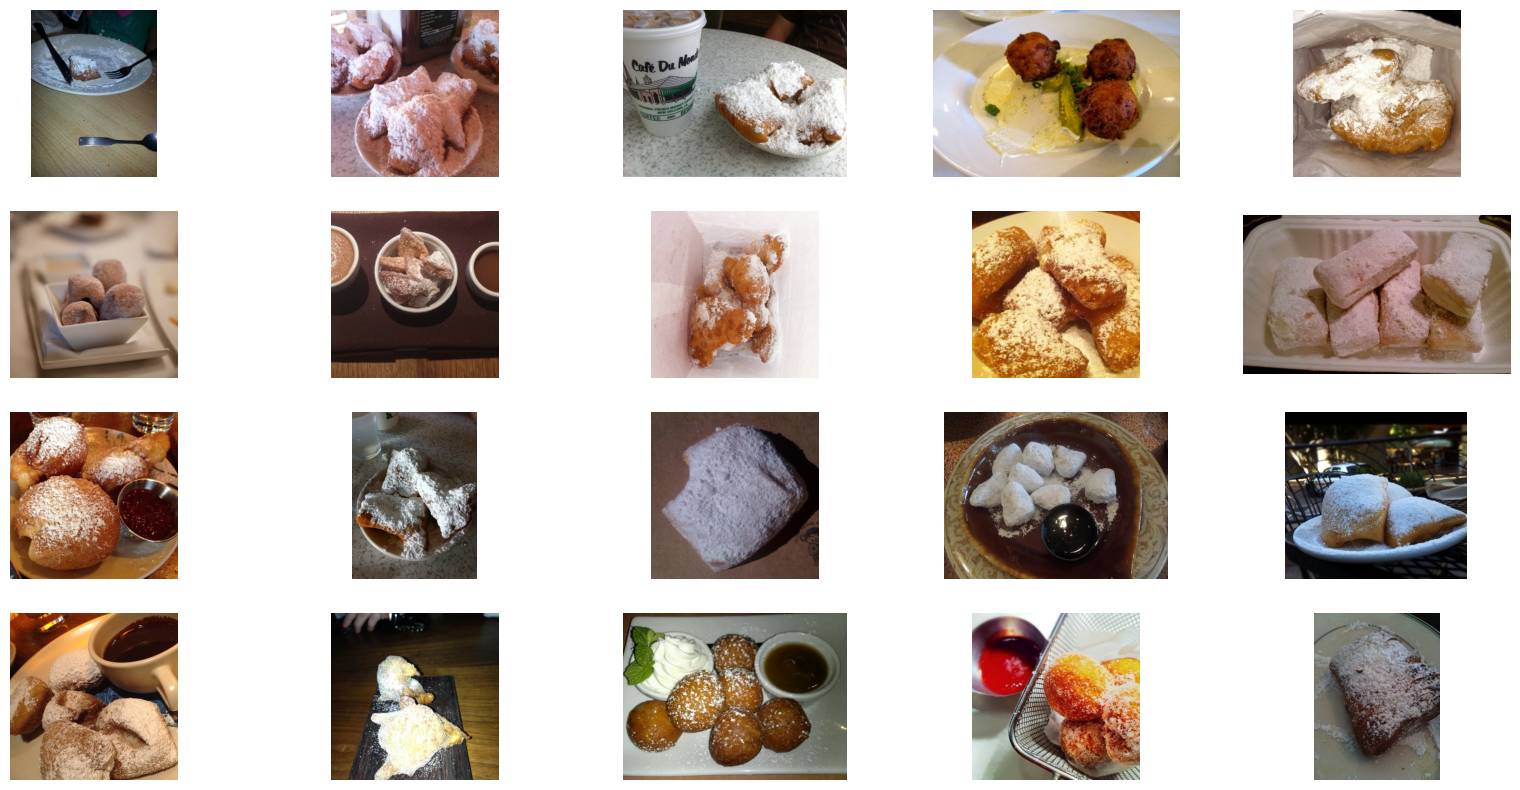

In [62]:
# 20가지 이미지 한 번에 확인하기
plt.figure(figsize=(20,10))
for i in range(20):
    image = data[i]['image']
    plt.subplot(4, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

어두운 이미지 필터링

    - 이미지들의 밝기 평균값을 구하고, 특정 임계값보다 어두우면 필터링 하도록 구현

In [101]:
dataset = []

for i in range(len(data)):
    dataset.append(data[i]['image'])

In [102]:
# 20가지 이미지의 평균 밝기

brightness_list = []
for i in range(20):
    image = dataset[i]
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    brightness = np.mean(gray_image) / 255.0  # 0~1 사이 값으로 정규화
    brightness_list.append(round(brightness, 2))

mean_brightness = round(np.mean(brightness_list), 2)
print(f"Mean Brightness of 20 images: {mean_brightness}")
print("Brightness values for each image:", brightness_list)

Mean Brightness of 20 images: 0.46
Brightness values for each image: [0.39, 0.51, 0.52, 0.61, 0.6, 0.53, 0.28, 0.73, 0.61, 0.49, 0.42, 0.36, 0.38, 0.32, 0.28, 0.46, 0.34, 0.46, 0.52, 0.4]


In [103]:
# 밝기가 임계값 이하인 경우 필터링하는 함수 구현
def filter_dark_images(dataset, n=20, threshold=0.3):
    kept_images = []
    removed_images = []

    for i in range(n):
        image = dataset[i]
        gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
        brightness = np.mean(gray_image) / 255.0  # 0~1 사이 값으로 정규화

        if brightness >= threshold:
            kept_images.append(image)
        else:
            removed_images.append(image)
    
    return kept_images, removed_images

In [105]:
kept_images, removed_images = filter_dark_images(dataset, n=20, threshold=0.35)

print(f'필터링 후 이미지 개수: ', len(kept_images))
print(f'필터링 된 이미지 개수: ', len(removed_images))

필터링 후 이미지 개수:  16
필터링 된 이미지 개수:  4


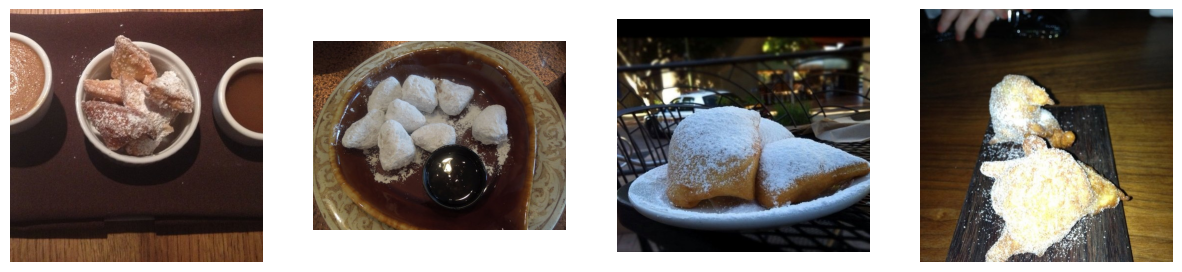

In [106]:
plt.figure(figsize=(15, 5))
for i in range(len(removed_images)):
    plt.subplot(1, len(removed_images), i+1)
    plt.imshow(removed_images[i])
    plt.axis('off')
plt.show()

In [112]:
# 각 이미지들의 w, h 크기 출력하기

w, h = [], []
for i in range(len(data)):
    image = data[i]['image']
    width, height = image.size
    w.append(width)
    h.append(height)
    print(f'Image {i+1}: Width = {width}, Height = {height}')

Image 1: Width = 384, Height = 512
Image 2: Width = 512, Height = 512
Image 3: Width = 512, Height = 383
Image 4: Width = 512, Height = 348
Image 5: Width = 512, Height = 512
Image 6: Width = 512, Height = 512
Image 7: Width = 512, Height = 512
Image 8: Width = 512, Height = 512
Image 9: Width = 512, Height = 512
Image 10: Width = 512, Height = 306
Image 11: Width = 512, Height = 512
Image 12: Width = 382, Height = 512
Image 13: Width = 512, Height = 512
Image 14: Width = 512, Height = 384
Image 15: Width = 512, Height = 471
Image 16: Width = 512, Height = 512
Image 17: Width = 512, Height = 512
Image 18: Width = 512, Height = 384
Image 19: Width = 512, Height = 512
Image 20: Width = 384, Height = 512


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
model = YOLO('yolo11m.pt')

# COCO 데이터셋에서 음식 및 용기 관련 클래스 번호
# 46~55: 음식류 (샌드위치, 오렌지, 피자 등)
RELEVANT_CLASSES = list(range(46, 56)) 

def get_robust_object_size(image_input, conf_threshold=0.15):
    img_rgb = np.array(image_input)
    
    # 1. 확신도(conf)를 낮게 설정하여 더 많은 후보를 찾음
    results = model(img_rgb, conf=conf_threshold, verbose=False)[0]
    
    max_area_ratio = 0
    best_box = None
    
    for box in results.boxes:
        class_id = int(box.cls[0])
        
        # 관련 클래스(음식/용기)이거나, 혹은 그냥 가장 큰 객체를 찾고 싶다면 조건 삭제 가능
        if class_id in RELEVANT_CLASSES:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            area = (x2 - x1) * (y2 - y1)
            total_area = img_rgb.shape[0] * img_rgb.shape[1]
            ratio = area / total_area
            
            if ratio > max_area_ratio:
                max_area_ratio = ratio
                best_box = [int(x1), int(y1), int(x2), int(y2)]

    # 2. 만약 관련 클래스를 못 찾았다면? -> 클래스 상관없이 가장 큰 객체 탐색 (Fallback)
    if not best_box and len(results.boxes) > 0:
        for box in results.boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            ratio = ((x2 - x1) * (y2 - y1)) / (img_rgb.shape[0] * img_rgb.shape[1])
            if ratio > max_area_ratio:
                max_area_ratio = ratio
                best_box = [int(x1), int(y1), int(x2), int(y2)]

    # 시각화 로직 (동일)
    vis_image = img_rgb.copy()
    if best_box:
        x1, y1, x2, y2 = best_box
        overlay = vis_image.copy()
        cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), -1) # 이번엔 초록색으로 표시
        cv2.addWeighted(overlay, 0.3, vis_image, 0.7, 0, vis_image)
        cv2.rectangle(vis_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return max_area_ratio, vis_image

Image 1 - 감지된 주 객체 크기 비율: 0.0410 (4.10%)
Image 2 - 감지된 주 객체 크기 비율: 0.4510 (45.10%)
Image 3 - 감지된 주 객체 크기 비율: 0.8691 (86.91%)
Image 4 - 감지된 주 객체 크기 비율: 0.4750 (47.50%)
Image 5 - 감지된 주 객체 크기 비율: 0.6647 (66.47%)
Image 6 - 감지된 주 객체 크기 비율: 0.0617 (6.17%)
Image 7 - 감지된 주 객체 크기 비율: 0.2482 (24.82%)
Image 8 - 감지된 주 객체 크기 비율: 0.4847 (48.47%)
Image 9 - 감지된 주 객체 크기 비율: 0.2206 (22.06%)
Image 10 - 감지된 주 객체 크기 비율: 0.0000 (0.00%)
Image 11 - 감지된 주 객체 크기 비율: 0.1392 (13.92%)
Image 12 - 감지된 주 객체 크기 비율: 0.9794 (97.94%)
Image 13 - 감지된 주 객체 크기 비율: 0.0000 (0.00%)
Image 14 - 감지된 주 객체 크기 비율: 0.0315 (3.15%)
Image 15 - 감지된 주 객체 크기 비율: 0.5064 (50.64%)
Image 16 - 감지된 주 객체 크기 비율: 0.0925 (9.25%)
Image 17 - 감지된 주 객체 크기 비율: 0.1055 (10.55%)
Image 18 - 감지된 주 객체 크기 비율: 0.0504 (5.04%)
Image 19 - 감지된 주 객체 크기 비율: 0.7836 (78.36%)
Image 20 - 감지된 주 객체 크기 비율: 0.6705 (67.05%)


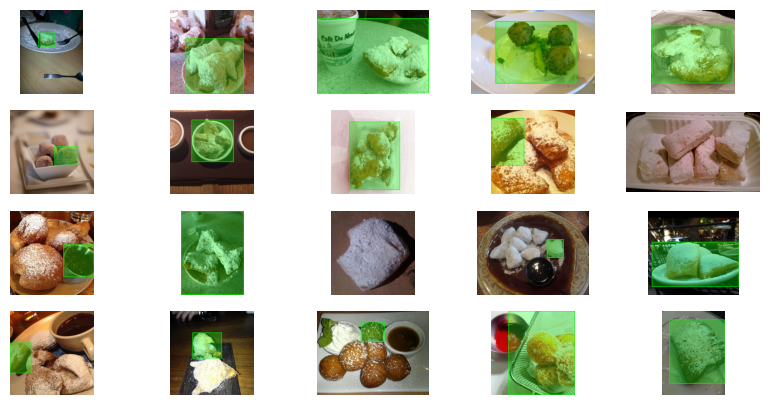

In [149]:
# 함수 실행
plt.figure(figsize=(10, 5))
for i in range(len(dataset)):
    ratio, result_img = get_robust_object_size(dataset[i], conf_threshold=0.25)
    print(f"Image {i+1} - 감지된 주 객체 크기 비율: {ratio:.4f} ({ratio*100:.2f}%)")
    plt.subplot(4, 5, i+1)
    plt.imshow(result_img)
    plt.axis('off')
plt.show()